## Import module

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preprocessing

In [41]:
data_wisata = pd.read_csv('tempat_wisata_yogyakarta.csv')
data_wisata.drop(columns=['Unnamed: 0'])
data_wisata = data_wisata.loc[(data_wisata['kategori'] != 'Pusat Perbelanjaan') ].reset_index(drop=True)
data_wisata = data_wisata.loc[(data_wisata['jumlah_ulasan'] >= 1000)].reset_index(drop=True)

In [42]:
len(data_wisata)

93

In [5]:
data_wisata.kategori.unique()

array(['Taman Hiburan', 'Budaya', 'Cagar Alam', 'Bahari'], dtype=object)

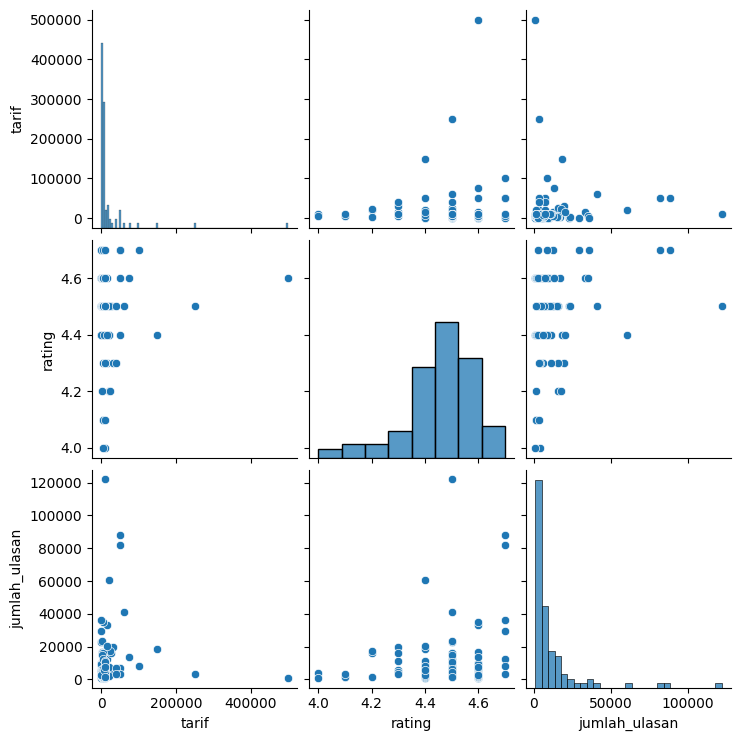

In [6]:
sns.pairplot(data_wisata[['tarif', 'rating', 'jumlah_ulasan']])

### Normalisasi data

In [7]:
from sklearn.preprocessing import MinMaxScaler
data = data_wisata[['tarif', 'rating', 'jumlah_ulasan']].copy()
scaler = MinMaxScaler()
scaler.fit(data)
data[['tarif', 'rating', 'jumlah_ulasan']] = scaler.transform(data)

In [8]:
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Clustering

<AxesSubplot: xlabel='Clusters', ylabel='WSS'>

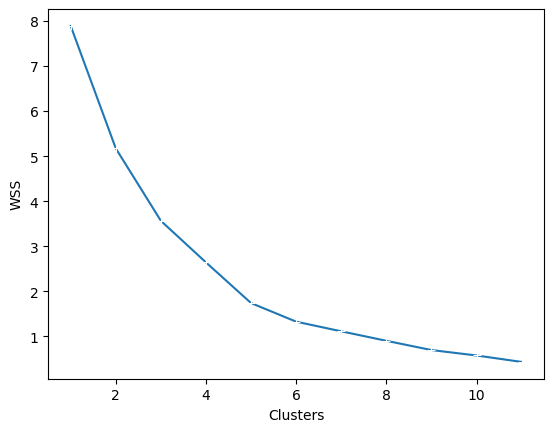

In [44]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data)
labels = kmeans.labels_

In [12]:
warna = {
    0 : 'red',
    1 : 'yellow',
    2 : 'green',
    3 : 'blue',
    4 : 'orange'
}
def atur_warna_kluster(kluster):
    return warna[kluster]
data_wisata['kluster'] = labels
data_wisata['warna_kluster'] = data_wisata['kluster'].apply(atur_warna_kluster)

<Figure size 1000x600 with 0 Axes>

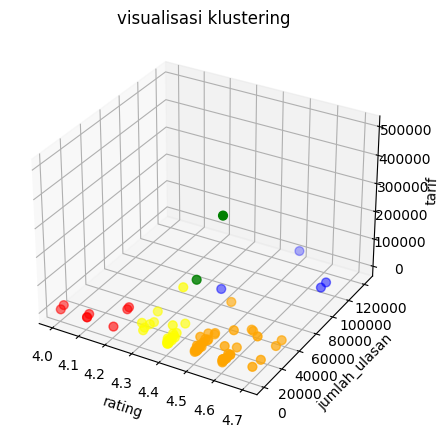

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
# for index, row in data_wisata.iterrows():
#     index = row.name
#     plt.text(row['rating'], row['tarif'], index)
    
# plt.scatter(data_wisata['rating'], data_wisata['tarif'], c=data_wisata['warna_kluster'])

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111, projection='3d')
x = data_wisata['rating']
y = data_wisata['jumlah_ulasan']
z = data_wisata['tarif']
ax.set_xlabel('rating')
ax.set_ylabel('jumlah_ulasan')
ax.set_zlabel('tarif')
ax.set_title('visualisasi klustering')
ax.scatter(x,y,z, marker="o", c=data_wisata["warna_kluster"], s=40)

In [14]:
data_wisata['warna_kluster'].value_counts()

orange    54
yellow    25
red        8
blue       4
green      2
Name: warna_kluster, dtype: int64

Text(0, 0.5, 'jumlah')

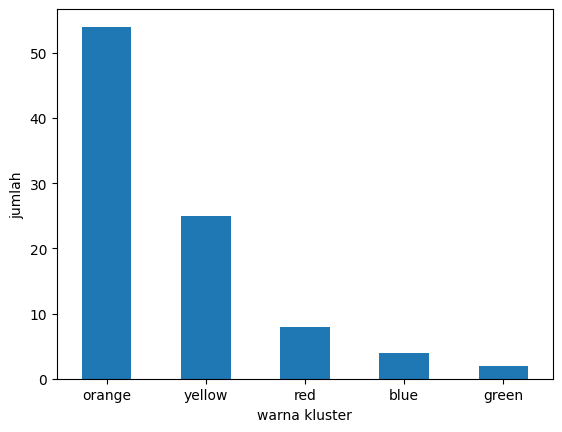

In [15]:
data_wisata['warna_kluster'].value_counts().plot(kind='bar', rot=0, )
plt.xlabel('warna kluster')
plt.ylabel('jumlah')

## Detail Rekomendasi

In [16]:
print('---------------- informasi kluster 0 ---------------------')
data_kluster_0 = data_wisata.loc[data_wisata['kluster'] == 0]
print('warna kluster 0 : ', warna[0])
print('rentang tarif  : ', data_kluster_0['tarif'].min(), ' - ', data_kluster_0['tarif'].max())
print('rentang rating : ', data_kluster_0['rating'].min(), ' - ', data_kluster_0['rating'].max())
print('rentang jumlah ulasan : ', data_kluster_0['jumlah_ulasan'].min(), ' - ', data_kluster_0['jumlah_ulasan'].max())
print()
print('rata-rata tarif  : ', data_kluster_0['tarif'].mean())
print('rata-rata rating : ', data_kluster_0['rating'].mean())
print('rata-rata jumlah ulasan : ', data_kluster_0['jumlah_ulasan'].mean())
print()
print('banyak kluster 0 : ', len(data_kluster_0), 'kluster')
print()

print('---------------- informasi kluster 1 ---------------------')
data_kluster_1 = data_wisata.loc[data_wisata['kluster'] == 1]
print('warna kluster 1 : ', warna[1])
print('rentang tarif  : ', data_kluster_1['tarif'].min(), ' - ', data_kluster_1['tarif'].max())
print('rentang rating : ', data_kluster_1['rating'].min(), ' - ', data_kluster_1['rating'].max())
print('rentang jumlah ulasan : ', data_kluster_1['jumlah_ulasan'].min(), ' - ', data_kluster_1['jumlah_ulasan'].max())
print()
print('rata-rata tarif  : ', data_kluster_1['tarif'].mean())
print('rata-rata rating : ', data_kluster_1['rating'].mean())
print('rata-rata jumlah ulasan : ', data_kluster_1['jumlah_ulasan'].mean())
print()
print('banyak kluster 1 : ', len(data_kluster_1), 'kluster')
print()

print('---------------- informasi kluster 2 ---------------------')
data_kluster_2 = data_wisata.loc[data_wisata['kluster'] == 2]
print('warna kluster 2 : ', warna[2])
print('rentang tarif  : ', data_kluster_2['tarif'].min(), ' - ', data_kluster_2['tarif'].max())
print('rentang rating : ', data_kluster_2['rating'].min(), ' - ', data_kluster_2['rating'].max())
print('rentang jumlah ulasan : ', data_kluster_2['jumlah_ulasan'].min(), ' - ', data_kluster_2['jumlah_ulasan'].max())
print()
print('rata-rata tarif  : ', data_kluster_2['tarif'].mean())
print('rata-rata rating : ', data_kluster_2['rating'].mean())
print('rata-rata jumlah ulasan : ', data_kluster_2['jumlah_ulasan'].mean())
print()
print('banyak kluster 2 : ', len(data_kluster_2), 'kluster')
print()

print('---------------- informasi kluster 3 ---------------------')
data_kluster_3 = data_wisata.loc[data_wisata['kluster'] == 3]
print('warna kluster 3 : ', warna[3])
print('rentang tarif  : ', data_kluster_3['tarif'].min(), ' - ', data_kluster_3['tarif'].max())
print('rentang rating : ', data_kluster_3['rating'].min(), ' - ', data_kluster_3['rating'].max())
print('rentang jumlah ulasan : ', data_kluster_3['jumlah_ulasan'].min(), ' - ', data_kluster_3['jumlah_ulasan'].max())
print()
print('rata-rata tarif  : ', data_kluster_3['tarif'].mean())
print('rata-rata rating : ', data_kluster_3['rating'].mean())
print('rata-rata jumlah ulasan : ', data_kluster_3['jumlah_ulasan'].mean())
print()
print('banyak kluster 3 : ', len(data_kluster_3), 'kluster')

print('---------------- informasi kluster 4 ---------------------')
data_kluster_4 = data_wisata.loc[data_wisata['kluster'] == 4]
print('warna kluster 4 : ', warna[4])
print('rentang tarif  : ', data_kluster_4['tarif'].min(), ' - ', data_kluster_4['tarif'].max())
print('rentang rating : ', data_kluster_4['rating'].min(), ' - ', data_kluster_4['rating'].max())
print('rentang jumlah ulasan : ', data_kluster_4['jumlah_ulasan'].min(), ' - ', data_kluster_4['jumlah_ulasan'].max())
print()
print('rata-rata tarif  : ', data_kluster_4['tarif'].mean())
print('rata-rata rating : ', data_kluster_4['rating'].mean())
print('rata-rata jumlah ulasan : ', data_kluster_4['jumlah_ulasan'].mean())
print()
print('banyak kluster 4 : ', len(data_kluster_4), 'kluster')

---------------- informasi kluster 0 ---------------------
warna kluster 0 :  red
rentang tarif  :  2000  -  22000
rentang rating :  4.0  -  4.2
rentang jumlah ulasan :  1057  -  17557

rata-rata tarif  :  9750.0
rata-rata rating :  4.1125
rata-rata jumlah ulasan :  5718.375

banyak kluster 0 :  8 kluster

---------------- informasi kluster 1 ---------------------
warna kluster 1 :  yellow
rentang tarif  :  0  -  150000
rentang rating :  4.3  -  4.4
rentang jumlah ulasan :  1015  -  20472

rata-rata tarif  :  17800.0
rata-rata rating :  4.376000000000001
rata-rata jumlah ulasan :  7077.72

banyak kluster 1 :  25 kluster

---------------- informasi kluster 2 ---------------------
warna kluster 2 :  green
rentang tarif  :  250000  -  500000
rentang rating :  4.5  -  4.6
rentang jumlah ulasan :  1107  -  3540

rata-rata tarif  :  375000.0
rata-rata rating :  4.55
rata-rata jumlah ulasan :  2323.5

banyak kluster 2 :  2 kluster

---------------- informasi kluster 3 ---------------------
wa

In [29]:
data_rekomendasi = pd.concat([data_kluster_3, data_kluster_4], axis='index')
data_rekomendasi


,Unnamed: 0,id_tempat,nama_tempat,deskripsi,kategori,kota,tarif,rating,waktu_menit,koordinat,latitude,longitude,jumlah_ulasan,kluster,warna_kluster
14,19,104,Tebing Breksi,Tebing Breksi merupakan tempat wisata yang ber...,Budaya,Yogyakarta,20000,4.4,NaN,"{'lat': -7.781571400000001, 'lng': 110.5045827}",-77.815.714,1.105.045.827,60306,3,blue
25,36,121,Candi Prambanan,Candi Prambanan atau Candi Roro Jonggrang (bah...,Budaya,Yogyakarta,50000,4.7,NaN,"{'lat': -7.752020600000001, 'lng': 110.4914674}",-77.520.206,1.104.914.674,81879,3,blue
58,85,170,Candi Borobudur,"Borobudur (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦧꦫꦧꦸꦝꦸꦂ, transli...",Budaya,Yogyakarta,50000,4.7,120.0,"{'lat': -7.6078738, 'lng': 110.2037513}",-76.078.738,1.102.037.513,88154,3,blue
63,92,177,Pantai Parangtritis,Pantai Parangtritis (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ ꦥꦫꦁꦠꦿ...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.024607999999999, 'lng': 110.3298045}",-8.024.608,1.103.298.045,121885,3,blue
0,0,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-78.006.715,1.103.676.551,6518,4,orange
1,1,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-78.052.845,1.103.642.031,33383,4,orange
3,3,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-78.002.016,1.103.663.044,16806,4,orange
5,5,90,Kampung Wisata Taman Sari,Taman Sari Yogyakarta atau Taman Sari Keraton ...,Taman Hiburan,Yogyakarta,5000,4.6,NaN,"{'lat': -7.8100673, 'lng': 110.3594581}",-78.100.673,1.103.594.581,35059,4,orange
7,7,92,Nol Kilometer Jl.Malioboro,"Walaupun hanyalah sebuah persimpangan, namun p...",Taman Hiburan,Yogyakarta,0,4.7,45.0,"{'lat': -7.8013803, 'lng': 110.3647652}",-78.013.803,1.103.647.652,35969,4,orange
8,8,93,Gembira Loka Zoo,Kebun Binatang Gembira Loka biasa disebut Gemb...,Cagar Alam,Yogyakarta,60000,4.5,NaN,"{'lat': -7.806234399999999, 'lng': 110.3967977}",-78.062.344,1.103.967.977,41202,4,orange


In [30]:
data_rekomendasi['kategori'].value_counts()

Bahari           20
Taman Hiburan    15
Budaya           12
Cagar Alam       11
Name: kategori, dtype: int64

In [38]:
# rekomendasi tempat wisata untuk kategori Budaya
data_rekomendasi.loc[data_rekomendasi['kategori'] == 'Budaya'].sort_values(by=['jumlah_ulasan', 'rating', 'tarif'], ascending=[False, False, True])[['nama_tempat', 'tarif', 'rating', 'jumlah_ulasan']]

,nama_tempat,tarif,rating,jumlah_ulasan
58,Candi Borobudur,50000,4.7,88154
25,Candi Prambanan,50000,4.7,81879
14,Tebing Breksi,20000,4.4,60306
1,Keraton Yogyakarta,15000,4.6,33383
12,Taman Budaya Yogyakarta,0,4.5,22710
3,Museum Benteng Vredeburg Yogyakarta,3000,4.6,16806
65,Candi Ratu Boko,75000,4.6,13346
10,Monumen Yogya Kembali,15000,4.5,12574
61,Museum Ullen Sentalu,100000,4.7,8337
27,Alun-alun Utara Keraton Yogyakarta,0,4.6,5262


In [37]:
# rekomendasi tempat wisata untuk kategori Taman Hiburan
data_rekomendasi.loc[data_rekomendasi['kategori'] == 'Taman Hiburan'].sort_values(by=['jumlah_ulasan', 'rating', 'tarif'], ascending=[False, False, True])[['nama_tempat', 'tarif', 'rating', 'jumlah_ulasan']]

,nama_tempat,tarif,rating,jumlah_ulasan
7,Nol Kilometer Jl.Malioboro,0,4.7,35969
5,Kampung Wisata Taman Sari,5000,4.6,35059
13,Tugu Pal Putih Jogja,0,4.7,29360
16,Hutan Pinus Pengger,3000,4.5,23338
18,Puncak Pinus Becici,3000,4.5,15812
19,Bukit Bintang Yogyakarta,25000,4.5,15812
9,Alun Alun Selatan Yogyakarta,0,4.6,9738
30,Gumuk Pasir Parangkusumo,0,4.5,8563
0,Taman Pintar Yogyakarta,6000,4.5,6518
21,Jurang Tembelan Kanigoro,2500,4.5,4069


In [35]:
# rekomendasi tempat wisata untuk kategori Cagar Alam
data_rekomendasi.loc[data_rekomendasi['kategori'] == 'Cagar Alam'].sort_values(by=['jumlah_ulasan', 'rating', 'tarif'], ascending=[False, False, True])[['nama_tempat', 'tarif', 'rating', 'jumlah_ulasan']]

,nama_tempat,tarif,rating,jumlah_ulasan
8,Gembira Loka Zoo,60000,4.5,41202
40,Bunker Kaliadem Merapi,3000,4.5,14785
53,"Bukit Paralayang, Watugupit",5000,4.7,12317
41,Ledok Sambi,0,4.6,9365
91,Taman Sungai Mudal,10000,4.6,7436
64,Goa Pindul,40000,4.5,7188
42,Seribu Batu Songgo Langit,2000,4.6,6115
52,Hutan Pinus Asri,2500,4.5,5017
45,Bukit Wisata Pulepayung,10000,4.5,4659
56,Kebun Teh Nglinggo,6000,4.5,3803


In [36]:
# rekomendasi tempat wisata untuk kategori Bahari
data_rekomendasi.loc[data_rekomendasi['kategori'] == 'Bahari'].sort_values(by=['jumlah_ulasan', 'rating', 'tarif'], ascending=[False, False, True])[['nama_tempat', 'tarif', 'rating', 'jumlah_ulasan']]

,nama_tempat,tarif,rating,jumlah_ulasan
63,Pantai Parangtritis,10000,4.5,121885
77,Pantai Drini,10000,4.5,10485
71,Pantai Krakal,10000,4.5,7501
79,Pantai Wediombo,5000,4.5,6580
49,Pantai Pulang Sawal,10000,4.5,5953
59,Pantai Indrayanti,10000,4.5,5953
86,Pantai Ngandong,10000,4.5,4478
51,Pantai Pok Tunggal,10000,4.5,3733
47,Pantai Ngrawe (Mesra),10000,4.5,3471
57,Pantai Timang,10000,4.7,3020


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6fd3c969-71bb-42a9-b8f6-32e847b35616' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>